In [44]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
df=pd.read_csv("C:/Users/mhalama/Desktop/gradient_descent/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [45]:
X=df[['TV','radio','newspaper']]
Y=df['sales']
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [46]:

def initialize(dim):
    b = random.random()
    theta=np.random.rand(dim)
    return b,theta

b,theta=initialize(3)
print('Bias: ',b,'Weights: ',theta)

Bias:  0.8183178312484733 Weights:  [0.12933731 0.13211229 0.71244866]


In [47]:
def predict_Y(b,theta,X):
    return b + np.dot(X,theta)
Y_hat=predict_Y(b,theta,X)
Y_hat[0:10]

array([ 2.33702335,  1.2823806 ,  2.09164276,  1.89972726,  1.66919562,
        2.29199812,  0.53752002,  0.12523042, -0.54537365,  0.40792056])

Funkcja celu aktualizacja odchylenia i wagi:

In [48]:
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

1.605779902615385

Parametry przekazywane do funkcji są następujące:

x,y: zmienna wejściowa i wyjściowa

y_hat: przewidywana wartość z aktualnym odchyleniem i wagą

b_0,theta_0: bieżące odchylenie i wagi

Szybkość uczenia się: szybkość uczenia się, aby dostosować krok aktualizacji

In [49]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1

print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)

print("After first update -Bias: ",b,"theta: ",theta)
get_cost(Y,Y_hat)

After initialization -Bias:  0.8183178312484733 theta:  [0.12933731 0.13211229 0.71244866]
After first update -Bias:  0.8019514746235039 theta:  [0.14138253 0.13578863 0.70173733]


1.605779902615385

Tworzenie funkcji spadku gradientu

In [59]:
def run_gradient_descent(X, Y, alpha=0.9, num_iterations=10):
    b,theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0

    for each_iter in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)

        plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost or MSE')
        plt.show()

        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
            result_idx=result_idx+1
            iter_num +=1
            print('Final Estimate of b and theta : ',b,theta)

            plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
            plt.xlabel('Number of iterations')
            plt.ylabel('Cost or MSE')
            plt.show()
            return gd_iterations_df,b,theta
            
        


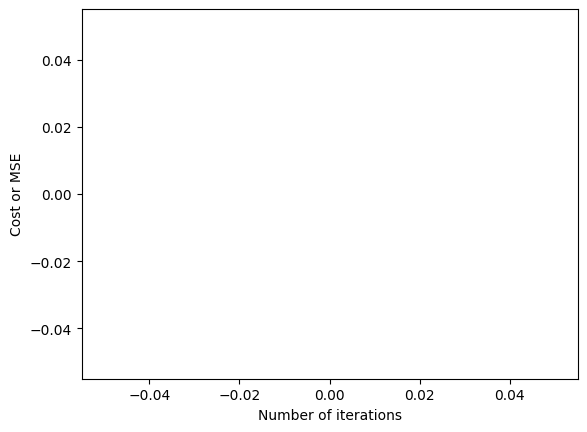

Final Estimate of b and theta :  -0.3010231071532168 [ 0.73714383  0.2101486  -0.42723937]


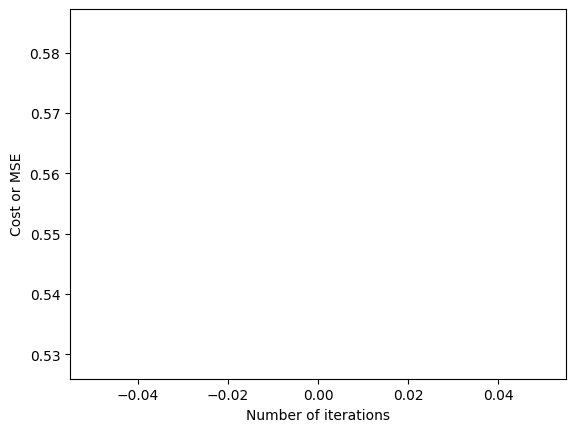

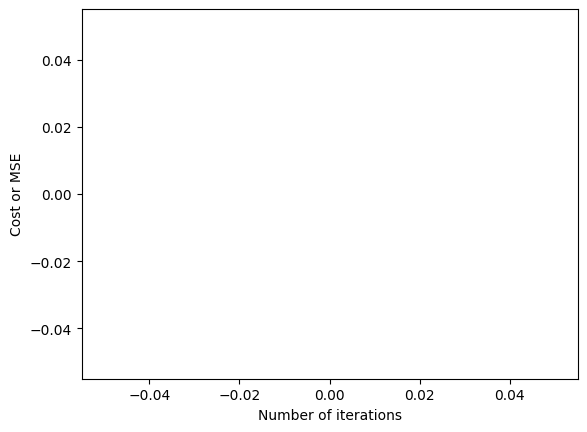

Final Estimate of b and theta :  -0.031474236507181674 [ 1.12729967  0.48417739 -0.0692623 ]


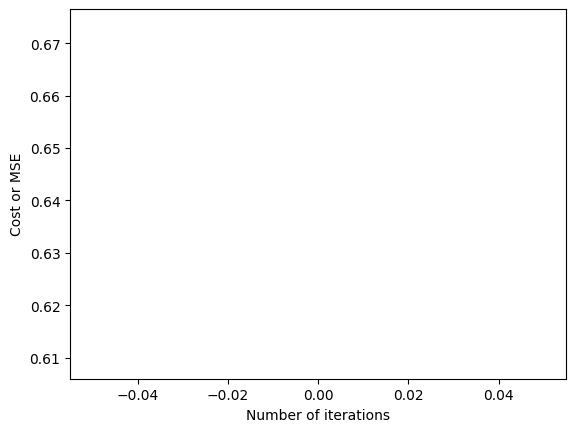

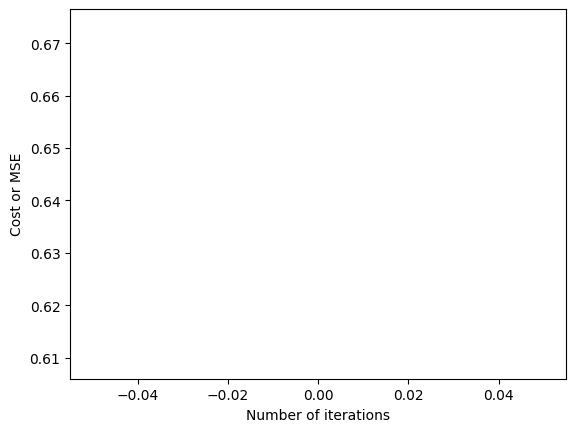

In [60]:

run_gradient_descent(X, Y, alpha=0.9, num_iterations=10)

gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.8,num_iterations=20)

        
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost or MSE')
plt.show()
